Het maken van een NOC_batch
-
Om met behulp van PCA anomalieën te detecteren in peniciline productie worden er vier stappen gezet.

1. Het maken van een NOC_batch
2. Het maken van de dif_batches
3. Het uitvoeren van de PCA
4. Het classificeren van de data

Deze stappen komen rechtstreeks uit een eerder opgesteld document om de werking van PCA uit te leggen en hoe PCA toe te passen in ons project. Dit document is meegestuurd in de bijlage.

In dit jupyter notebook wordt de eerste stap uitgevoerd, het maken van een NOC_batch. De term NOC staat voor normal operating conditions. In processen zoals het produceren van peniciline kan een NOC_batch gedefineerd worden als de condities waar een systeem zich in ideale omstandigheden in bevind.

Deze NOC_batch kan vervolgens gebruikt worden om te bepalen hoever andere batches hier van afliggen en dus hoe niet ideaal de condities waren in deze batch. 

Om een NOC_batch te kunnen maken moet eerst bepaald worden hoe deze eruit zou moeten zien en hoe deze te verkrijgen is. Gelukkig voor ons is het dataframe opgedeeld in verschillende campagnes, waarin het proces op een andere manier word gecontroleerd en aangestuurd. Een van deze campagne maakt gebruik van een geavenceerd control systeem. Dit zouden dus ever het algemeen de beste batches moeten zijn die in dit dataframe te vinden zijn. 

De campagne bevat 29 batches. Dit zijn de batches met nummer 61 tot en met 89. Hier zijn de kortste batches uitgehaald. Hierna blijven de volgende 14 batches over (61,62,63,64,65,66,68,69,70,71,72,73,74,76). Om van deze 14 'ideale batches' een NOC_batch te maken wordt he tgemiddelde genomen van al deze batches op elke timestamp. De kortste batch is 1000 timestamps en alle batches worden hier op afgekort. Op deze manier blijft er één batch over van 1000 timestamps. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\pimja\Documents\HU\Q1\PRJ\Code\100_Batches/V3.csv')

In [2]:
plt.rcParams['figure.figsize'] = [25, 5]
NOC_BATCHES = [61,62,63,64,65,66,68,69,70,71,72,73,74,76]
FEATURES = [1,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20,22,24,28,29]
AMOUNT_OF_TIMESTAMPS = 1000

Hieronder wordt het dataframe laten zien zoals deze oorspronkelijk is. 

In [3]:
df

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
0,0.2,30,100,8,0.0000,30.1180,9.8335,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.4,30,100,8,0.0000,51.2210,18.1550,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.6,30,100,8,0.0000,54.3020,9.5982,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.8,30,100,8,0.0000,37.8160,4.3395,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,30,100,8,0.5181,18.9080,1.1045,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113930,229.2,65,100,80,0.0000,12.9000,33.5860,5.93590,250,0.9,...,816050.0,823390.0,830160.0,835530.0,839140.0,840570.0,840160.0,838580.0,NaN,NaN
113931,229.4,65,100,80,0.0000,10.0470,10.0760,98.83400,250,0.9,...,773520.0,780840.0,787470.0,792750.0,796220.0,797610.0,797270.0,796020.0,NaN,NaN
113932,229.6,65,100,80,0.0000,7.3609,69.3450,9.88340,250,0.9,...,788240.0,795550.0,802190.0,807420.0,810590.0,811660.0,811210.0,809960.0,NaN,NaN
113933,229.8,65,100,80,0.0000,6.2794,38.6100,0.98834,250,0.9,...,781180.0,788420.0,794950.0,800140.0,803610.0,804900.0,804490.0,803410.0,NaN,NaN


Hieronder (linker plot) wordt de carbon dioxide laten zien van de derde batch in het dataframe. Zoals te zien is, is deze waarde niet constand over de hele tijd. Als we verschillende batches plotten (rechter plot) is te zien dat zij best veel op elkaar lijken. Elke piek komt precies overeen tussen de batches, enkel de hoogte verschilt iets.

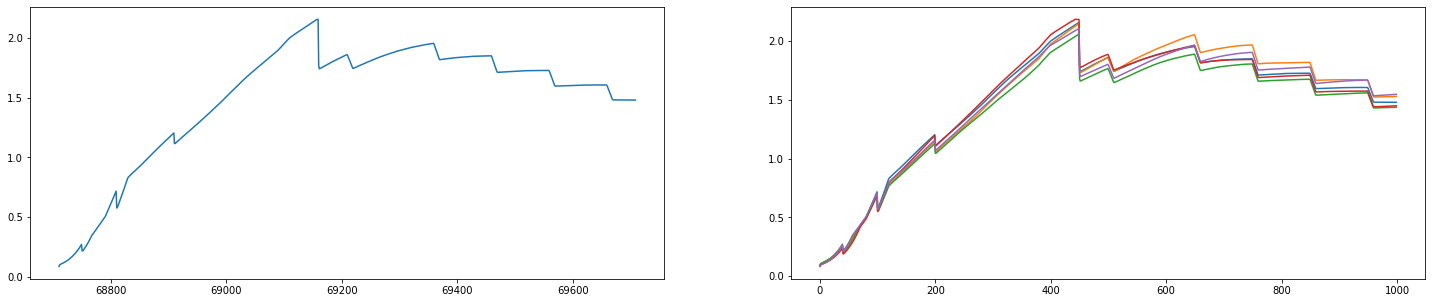

In [4]:
fig, axs = plt.subplots(1,2)
df.loc[df[" 1-Raman spec recorded"] == 61, 'carbon dioxide percent in off-gas(CO2outgas:%)'].head(1000).plot(ax=axs[0])

for i in [61,62,63,64,65]:
    batch = df[df[" 1-Raman spec recorded"] == i].head(1000)
    batch.index = list(range(len(batch)))
    batch["carbon dioxide percent in off-gas(CO2outgas:%)"].plot(ax=axs[1])


Nu dat verificatie hebben van de consistentie in de data, kan de NOC_batch gemaakt worden. Dit wordt, zoals eerder al gezecht, gedaan door het gemiddelde te nemen van 14 batches. Hieronder de code die dit doet.

Naast het gemiddelde nemen van de batches worden ook:
- alle batches afgekort naar 'AMOUNT_OF_TIMESTAMPS' timestamps d.m.v. de .head() functie;
- Enkel de nuttige features uit de dataframe gehaald. 
    - batch = batch.iloc[:, 'FEATURES']

Na dit blok code is de NOC_batch over in een shape van (23 features x 1000 timestamps).

In [5]:
SUM_batch = df[df[" 1-Raman spec recorded"] == NOC_BATCHES.pop(0)].head(AMOUNT_OF_TIMESTAMPS)
SUM_batch.index = list(range(len(SUM_batch)))
SUM_batch = SUM_batch.iloc[:, FEATURES]
for i in NOC_BATCHES:

    batch = df[df[" 1-Raman spec recorded"] == i].head(AMOUNT_OF_TIMESTAMPS)
    batch.index = list(range(len(batch)))
    batch = batch.iloc[:, FEATURES]

    SUM_batch += batch
NOC_batch = SUM_batch/(len(NOC_BATCHES)+1)
NOC_batch

,Aeration rate(Fg:L/h),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),Dumped broth flow(Fremoved:L/h),Substrate concentration(S:g/L),...,Penicillin concentration(P:g/L),pH(pH:pH),Temperature(T:K),Generated heat(Q:kJ),carbon dioxide percent in off-gas(CO2outgas:%),PAA flow(Fpaa:PAA flow (L/h)),Oil flow(Foil:L/hr),Oxygen Uptake Rate(OUR:(g min^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs)
0,30.0,8.0,0.000000,13.162429,0.000100,222.957929,0.0,0.6,0.0,1.001621,...,0.001000,6.513779,297.672143,208.977786,0.088374,5.000000,22.0,-0.043902,0.033611,0.0
1,30.0,8.0,0.000000,22.369226,0.000100,65.725571,0.0,0.6,0.0,1.049296,...,0.000999,6.514150,297.883571,265.540000,0.100199,5.000000,22.0,-0.061233,0.038110,0.0
2,30.0,8.0,0.112099,26.977579,0.000100,0.000100,0.0,0.6,0.0,1.095264,...,0.000999,6.517650,297.864286,260.358286,0.104133,5.000000,22.0,-0.061904,0.039607,0.0
3,30.0,8.0,0.074636,25.814857,0.000100,86.107714,0.0,0.6,0.0,1.139643,...,0.000998,6.521650,298.150714,336.679286,0.106513,5.000000,22.0,-0.055772,0.040511,0.0
4,30.0,8.0,0.147631,17.790786,94.091286,8.610771,0.0,0.6,0.0,1.182429,...,0.000998,6.523164,298.042857,307.634286,0.108645,5.000000,22.0,-0.046258,0.041323,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,75.0,80.0,0.000000,68.283786,19.615051,55.321700,150.0,0.9,0.0,0.001428,...,28.646786,6.498821,297.977143,281.048571,1.512871,7.623429,23.0,1.211750,1.444107,0.0
996,75.0,80.0,0.000000,68.702500,34.171551,35.434025,150.0,0.9,0.0,0.001421,...,28.668071,6.501450,297.967143,276.717857,1.513179,7.629414,23.0,1.214314,1.444400,0.0
997,75.0,80.0,0.000000,68.446786,34.754633,38.138444,150.0,0.9,0.0,0.001412,...,28.689071,6.503300,297.959286,274.485071,1.513471,7.628493,23.0,1.217693,1.444671,0.0
998,75.0,80.0,0.000000,67.647286,33.088199,28.354289,150.0,0.9,0.0,0.001407,...,28.709929,6.504021,297.933571,264.502000,1.513757,7.619293,23.0,1.219207,1.444936,0.0


Hieronder worden 5 van de 'ideale batches' (groen) tegen de NOC_batch (oranje) afgezet. Hier is goed te zien dat de ene batch iets boven de NOC ligt en de ander er iets boven maar de hoofdlijn van de NOC wordt wel gevolgd.

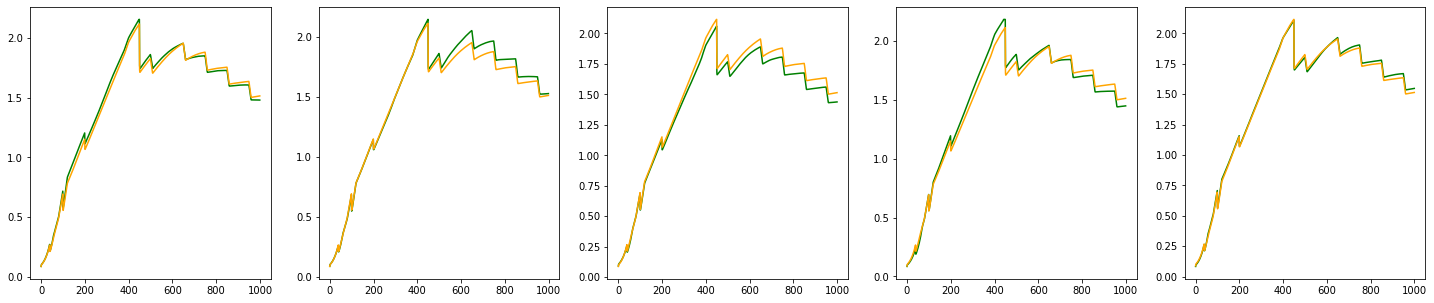

In [6]:
fig, axs = plt.subplots(1,5)
NOC_BATCHES = [61,62,63,64,65]
for i in range(len(NOC_BATCHES)):

    batch = df[df[" 1-Raman spec recorded"] == NOC_BATCHES[i]].head(AMOUNT_OF_TIMESTAMPS)
    batch.index = list(range(len(batch)))
    batch = batch.iloc[:, FEATURES]
    batch["carbon dioxide percent in off-gas(CO2outgas:%)"].plot(ax=axs[i], c='g')
    NOC_batch["carbon dioxide percent in off-gas(CO2outgas:%)"].plot(ax=axs[i], c='orange')


Interresant wordt het als we een aantal van de foutieve batches vergelijken met de NOC_batch. Hier is te zien dat bij deze feature alleen al grote uitschieters te zien zijn in een aantal van de foutieve batches.

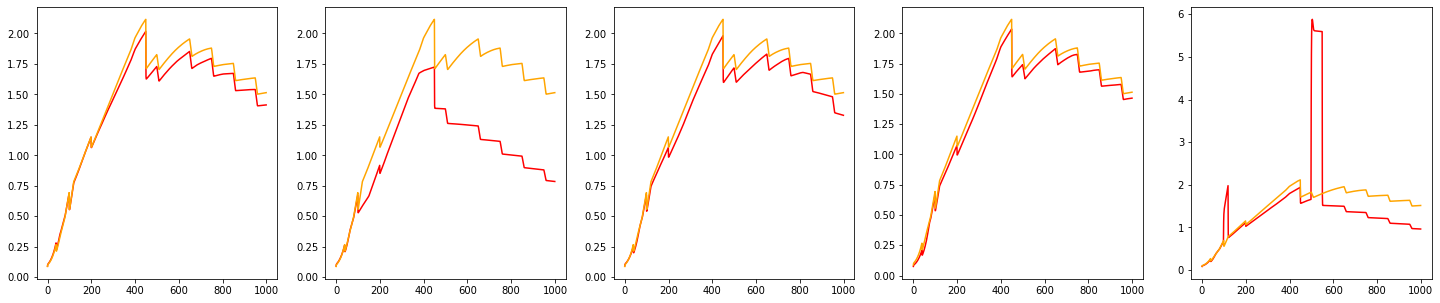

In [7]:
fig, axs = plt.subplots(1,5)
NOC_BATCHES = [90,91,92,93,94]
for i in range(len(NOC_BATCHES)):

    batch = df[df[" 1-Raman spec recorded"] == NOC_BATCHES[i]].head(AMOUNT_OF_TIMESTAMPS)
    batch.index = list(range(len(batch)))
    batch = batch.iloc[:, FEATURES]
    batch["carbon dioxide percent in off-gas(CO2outgas:%)"].plot(ax=axs[i], c='r')
    NOC_batch["carbon dioxide percent in off-gas(CO2outgas:%)"].plot(ax=axs[i], c='orange')

In de volgende jupyter notebook zal met behulp van de NOC_batch de dif_batches gemaakt worden.

In [8]:
#NOC_batch.to_csv(r'C:\Users\pimja\Documents\HU\Q1\PRJ\Code\100_Batches/NOC_BATCH.csv', index=False)